Тема “Создание признакового пространства”
---

Продолжим обработку данных с Твиттера. 

1. Создайте мешок слов с помощью sklearn.feature_extraction.text.CountVectorizer.fit_transform(). Применим его к 'tweet_stemmed' и 'tweet_lemmatized' отдельно.
 - Игнорируем слова, частота которых в документе строго превышает порог 0.9 с помощью max_df.
 - Ограничим количество слов, попадающий в мешок, с помощью max_features = 1000.
 - Исключим стоп-слова с помощью stop_words='english'. 
 - Отобразим Bag-of-Words модель как DataFrame. columns необходимо извлечь с помощью CountVectorizer.get_feature_names().
 
2. Создайте мешок слов с помощью sklearn.feature_extraction.text.TfidfVectorizer.fit_transform(). Применим его к 'tweet_stemmed' и 'tweet_lemmatized' отдельно.
 - Игнорируем слова, частота которых в документе строго превышает порог 0.9 с помощью max_df.
 - Ограничим количество слов, попадающий в мешок, с помощью max_features = 1000.
 - Исключим стоп-слова с помощью stop_words='english'.
 - Отобразим Bag-of-Words модель как DataFrame. columns необходимо извлечь с помощью TfidfVectorizer.get_feature_names().


3. Проверьте ваши векторайзеры на корпусе который использовали на вебинаре, составьте таблицу метод векторизации и скор который вы получили (в методах векторизации по изменяйте параметры что бы добиться лучшего скора) обратите внимание как падает/растёт скор при уменьшении количества фичей, и изменении параметров, так же попробуйте применить к векторайзерам PCA для сокращения размерности посмотрите на качество сделайте выводы

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn import model_selection, preprocessing, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn import decomposition
from sklearn.decomposition import PCA

In [2]:
combine_df = pd.read_pickle("../../data/nlp/tweets.pkl")
combine_df.head()

,id,label,tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,1,0.0,when father is dysfunctional and is so selfish...,"[when, father, is, dysfunctional, and, is, so,...","[father, dysfunctional, selfish, drags, kids, ...","[father, dysfunct, selfish, drag, kid, dysfunc...","[father, dysfunctional, selfish, drag, kid, dy..."
1,2,0.0,thanks for lyft credit can use cause they don ...,"[thanks, for, lyft, credit, can, use, cause, t...","[thanks, lyft, credit, use, cause, offer, whee...","[thank, lyft, credit, use, caus, offer, wheelc...","[thanks, lyft, credit, use, cause, offer, whee..."
2,3,0.0,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]","[bihday, majesti]","[bihday, majesty]"
3,4,0.0,model love you take with you all the time in ur,"[model, love, you, take, with, you, all, the, ...","[model, love, take, time, ur]","[model, love, take, time, ur]","[model, love, take, time, ur]"
4,5,0.0,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, motivation]","[factsguid, societi, motiv]","[factsguide, society, motivation]"


In [3]:
# Преобразуем данные и выделим их в отдельный датафрейм
combine_df['tweet_stemmed'] = combine_df['tweet_stemmed'].apply(lambda tokens: ' '.join(tokens))
combine_df['tweet_lemmatized'] = combine_df['tweet_lemmatized'].apply(lambda tokens: ' '.join(tokens))
combine_df.head()

,id,label,tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,1,0.0,when father is dysfunctional and is so selfish...,"[when, father, is, dysfunctional, and, is, so,...","[father, dysfunctional, selfish, drags, kids, ...",father dysfunct selfish drag kid dysfunct run,father dysfunctional selfish drag kid dysfunct...
1,2,0.0,thanks for lyft credit can use cause they don ...,"[thanks, for, lyft, credit, can, use, cause, t...","[thanks, lyft, credit, use, cause, offer, whee...",thank lyft credit use caus offer wheelchair va...,thanks lyft credit use cause offer wheelchair ...
2,3,0.0,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]",bihday majesti,bihday majesty
3,4,0.0,model love you take with you all the time in ur,"[model, love, you, take, with, you, all, the, ...","[model, love, take, time, ur]",model love take time ur,model love take time ur
4,5,0.0,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, motivation]",factsguid societi motiv,factsguide society motivation


1. Создайте мешок слов с помощью `sklearn.feature_extraction.text.CountVectorizer.fit_transform()`. Применим его к 'tweet_stemmed' и 'tweet_lemmatized' отдельно.
- Игнорируем слова, частота которых в документе строго превышает порог 0.9 с помощью `max_df`.
- Ограничим количество слов, попадающий в мешок, с помощью `max_features = 1000`.
- Исключим стоп-слова с помощью `stop_words='english'`. 
- Отобразим Bag-of-Words модель как DataFrame. columns необходимо извлечь с помощью `CountVectorizer.get_feature_names()`.

In [4]:
count_vectorizer = CountVectorizer(ngram_range=(1, 1), 
                                   analyzer='word', 
                                   binary=False, 
                                   tokenizer=str.split, # процедура токенизации
                                   stop_words="english", 
                                   max_df=0.9, 
                                   max_features=1000)
count_vectorizer

CountVectorizer(max_df=0.9, max_features=1000, stop_words='english',
                tokenizer=<method 'split' of 'str' objects>)

In [5]:
# Создаем the Bag-of-Words модель для tweet_stemmed
bag_of_words_stemmed = count_vectorizer.fit_transform(combine_df['tweet_stemmed'])
bag_of_words_stemmed

<49159x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 206686 stored elements in Compressed Sparse Row format>

In [6]:
# Отобразим Bag-of-Words модель как DataFrame
columns = count_vectorizer.get_feature_names()
stemmed_count = pd.DataFrame(bag_of_words_stemmed.toarray(), columns=columns)
stemmed_count.head()

,abl,absolut,accept,account,act,action,actor,actual,ad,adapt,...,yeah,year,yesterday,yo,yoga,york,young,youtub,yr,yummi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Создаем the Bag-of-Words модель для tweet_lemmatized
bag_of_words_lemmatized = count_vectorizer.fit_transform(combine_df['tweet_lemmatized'])
bag_of_words_lemmatized

<49159x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 191317 stored elements in Compressed Sparse Row format>

In [8]:
# Отобразим Bag-of-Words модель как DataFrame
columns = count_vectorizer.get_feature_names()
lemmatized_count = pd.DataFrame(bag_of_words_lemmatized.toarray(), columns=columns)
lemmatized_count.head()

,able,absolutely,account,act,action,actor,actually,adapt,add,adventure,...,year,yes,yesterday,yo,yoga,york,young,youtube,yr,yummy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


2. Создайте мешок слов с помощью `sklearn.feature_extraction.text.TfidfVectorizer.fit_transform(). Применим его к 'tweet_stemmed' и 'tweet_lemmatized' отдельно.
- Игнорируем слова, частота которых в документе строго превышает порог 0.9 с помощью `max_df`.
- Ограничим количество слов, попадающий в мешок, с помощью `max_features = 1000`.
- Исключим стоп-слова с помощью `stop_words='english'`.
- Отобразим Bag-of-Words модель как DataFrame. columns необходимо извлечь с помощью `TfidfVectorizer.get_feature_names()`.

In [9]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 1), 
                                   analyzer='word', 
                                   binary=False, 
                                   tokenizer=str.split, 
                                   stop_words='english', 
                                   max_df=0.9, 
                                   max_features=1000)
tfidf_vectorizer

TfidfVectorizer(max_df=0.9, max_features=1000, stop_words='english',
                tokenizer=<method 'split' of 'str' objects>)

In [10]:
# Создаем the Bag-of-Words модель для tweet_stemmed
bag_of_words_stemmed = tfidf_vectorizer.fit_transform(combine_df['tweet_stemmed'])
bag_of_words_stemmed

<49159x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 206686 stored elements in Compressed Sparse Row format>

In [11]:
# Отобразим Bag-of-Words модель как DataFrame
columns = tfidf_vectorizer.get_feature_names()
stemmed_tfidf = pd.DataFrame(bag_of_words_stemmed.toarray(), columns=columns)
stemmed_tfidf.head()

,abl,absolut,accept,account,act,action,actor,actual,ad,adapt,...,yeah,year,yesterday,yo,yoga,york,young,youtub,yr,yummi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Создаем the Bag-of-Words модель для tweet_lemmatized
bag_of_words_lemmatized = tfidf_vectorizer.fit_transform(combine_df['tweet_lemmatized'])

In [13]:
# Отобразим Bag-of-Words модель как DataFrame
columns = tfidf_vectorizer.get_feature_names()
lemmatized_tfidf = pd.DataFrame(bag_of_words_lemmatized.toarray(), columns=columns)
lemmatized_tfidf.head()

,able,absolutely,account,act,action,actor,actually,adapt,add,adventure,...,year,yes,yesterday,yo,yoga,york,young,youtube,yr,yummy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


3. Проверьте ваши векторайзеры на корпусе который использовали на вебинаре, 
- составьте таблицу метод векторизации и скор который вы получили (в методах векторизации поизменяйте параметры что бы добиться лучшего скора)
- обратите внимание как падает/растёт скор при уменьшении количества фичей, и изменении параметров, 
- попробуйте применить к векторайзерам PCA для сокращения размерности. Посмотрите на качество сделайте выводы

In [14]:
# Загружаем данные
data = open('corpus').read()
labels, texts = [], []
for i, line in enumerate(data.split("\n")):
    content = line.split()
    labels.append(content[0])
    texts.append(" ".join(content[1:]))

# создаем df
trainDF = pd.DataFrame()
trainDF['text'] = texts
trainDF['label'] = labels
trainDF.head(5)

,text,label
0,Stuning even for the non-gamer: This sound tra...,__label__2
1,The best soundtrack ever to anything.: I'm rea...,__label__2
2,Amazing!: This soundtrack is my favorite music...,__label__2
3,Excellent Soundtrack: I truly like this soundt...,__label__2
4,"Remember, Pull Your Jaw Off The Floor After He...",__label__2


In [15]:
trainDF.label.unique()

array(['__label__2', '__label__1'], dtype=object)

In [16]:
# задаём векторайзеры
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vectorizer = CountVectorizer(ngram_range=(1, 1), 
                                   analyzer='word', 
                                   binary=False, 
                                   tokenizer=str.split, # процедура токенизации
                                   stop_words="english", 
                                   max_df=0.9, 
                                   max_features=12000)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 1), 
                                   analyzer='word', 
                                   binary=False, 
                                   tokenizer=str.split, 
                                   stop_words='english', 
                                   max_df=0.9, 
                                   max_features=8000)

# список векторайзеров
vectorizers = [['count_vect', count_vect], ['count_vectorizer', count_vectorizer], ['tfidf_vectorizer', tfidf_vectorizer]]

# пустой датафрейм для записи результатов
results = pd.DataFrame(columns=['vectorizer', 'mse', 'mae', 'r2 score'])

i = 0
for vectorizer in tqdm(vectorizers):
    train_x, valid_x, train_y, valid_y = model_selection.train_test_split(trainDF['text'],
                                                                          trainDF['label'],
                                                                          train_size=0.75, 
                                                                          shuffle=False, 
                                                                          random_state=1,
                                                                         )
    # labelEncode целевую переменную
    encoder = preprocessing.LabelEncoder()
    train_y = encoder.fit_transform(train_y)
    valid_y = encoder.fit_transform(valid_y)


    vectorizer[1].fit(trainDF['text'])

    xtrain_count =  vectorizer[1].transform(train_x)
    xvalid_count =  vectorizer[1].transform(valid_x)

    #classifier = linear_model.LogisticRegression() # без указания солвера ошибка: 'str' object has no attribute 'decode'
    classifier = linear_model.LogisticRegression(solver='liblinear')
    classifier.fit(xtrain_count, train_y)
    predictions = classifier.predict(xvalid_count)

    #accuracy_score(valid_y, predictions)
    results.loc[i] = [vectorizer[0], 
                    mean_squared_error(valid_y, predictions), 
                    mean_absolute_error(valid_y, predictions),
                    r2_score(valid_y, predictions)
                     ]
    i += 1
results

 33%|████████████████████████████                                                        | 1/3 [00:01<00:02,  1.35s/it]C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
 67%|████████████████████████████████████████████████████████                            | 2/3 [00:02<00:01,  1.20s/it]C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.02it/s]


,vectorizer,mse,mae,r2 score
0,count_vect,0.1424,0.1424,0.430207
1,count_vectorizer,0.1712,0.1712,0.314968
2,tfidf_vectorizer,0.1668,0.1668,0.332574


**Вывод**: максимальное качество при количестве слов векторайзеров 12000 для countVectorizer и 8000 для TfidfVectorizer.

In [17]:
# задаём векторайзер
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 1), 
                                   analyzer='word', 
                                   binary=False, 
                                   tokenizer=str.split, 
                                   stop_words='english', 
                                   max_df=0.9, 
                                   max_features=8000)

# пустой датафрейм для записи результатов
results = pd.DataFrame(columns=['vectorizer', 'mse', 'mae', 'r2 score'])

pca = PCA(n_components=50)
pca.fit(lemmatized_tfidf)



train_x, valid_x, train_y, valid_y = model_selection.train_test_split(trainDF['text'],
                                                                      trainDF['label'],
                                                                      train_size=0.75, 
                                                                      shuffle=False, 
                                                                      random_state=1,
                                                                     )
# labelEncode целевую переменную
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)


vectorizer[1].fit(trainDF['text'])

xtrain_count =  vectorizer[1].transform(train_x)
xvalid_count =  vectorizer[1].transform(valid_x)

#classifier = linear_model.LogisticRegression() # без указания солвера ошибка: 'str' object has no attribute 'decode'
classifier = linear_model.LogisticRegression(solver='liblinear')
classifier.fit(xtrain_count, train_y)
predictions = classifier.predict(xvalid_count)

#accuracy_score(valid_y, predictions)
results.loc[1] = [vectorizer[0], 
                mean_squared_error(valid_y, predictions), 
                mean_absolute_error(valid_y, predictions),
                r2_score(valid_y, predictions)
                 ]

results

C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


,vectorizer,mse,mae,r2 score
1,tfidf_vectorizer,0.1668,0.1668,0.332574


In [18]:
# пустой датафрейм для записи результатов
results = pd.DataFrame(columns=['n_features', 'mse', 'mae', 'r2 score'])

i = 0
for n_features in np.geomspace(200, 15000, 15).round(-2):
    
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 1), 
                                       analyzer='word', 
                                       binary=False, 
                                       tokenizer=str.split, 
                                       stop_words='english', 
                                       max_df=0.9, 
                                       max_features=int(n_features))
    
    train_x, valid_x, train_y, valid_y = model_selection.train_test_split(trainDF['text'],
                                                                          trainDF['label'],
                                                                          train_size=0.75, 
                                                                          shuffle=False, 
                                                                          random_state=1,
                                                                         )
    # labelEncode целевую переменную
    encoder = preprocessing.LabelEncoder()
    train_y = encoder.fit_transform(train_y)
    valid_y = encoder.fit_transform(valid_y)


    tfidf_vectorizer.fit(trainDF['text'])

    xtrain_count =  tfidf_vectorizer.transform(train_x)
    xvalid_count =  tfidf_vectorizer.transform(valid_x)

    #classifier = linear_model.LogisticRegression() # без указания солвера ошибка: 'str' object has no attribute 'decode'
    classifier = linear_model.LogisticRegression(solver='liblinear')
    classifier.fit(xtrain_count, train_y)
    predictions = classifier.predict(xvalid_count)

    #accuracy_score(valid_y, predictions)
    results.loc[i] = [n_features, 
                    mean_squared_error(valid_y, predictions), 
                    mean_absolute_error(valid_y, predictions),
                    r2_score(valid_y, predictions)
                     ]
    i += 1
results

C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
C:\Users\Alex\Anaconda3\lib\site-packages\sklear

,n_features,mse,mae,r2 score
0,200.0,0.2360,0.2360,0.055680
1,300.0,0.2264,0.2264,0.094093
2,400.0,0.2184,0.2184,0.126104
3,500.0,0.2100,0.2100,0.159716
4,700.0,0.1964,0.1964,0.214134
5,900.0,0.1892,0.1892,0.242944
6,1300.0,0.1860,0.1860,0.255748
7,1700.0,0.1820,0.1820,0.271753
8,2400.0,0.1776,0.1776,0.289359
9,3200.0,0.1668,0.1668,0.332574


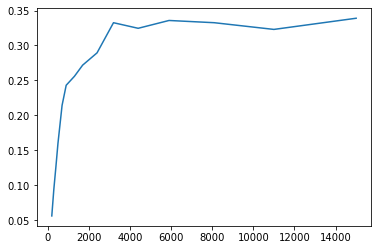

In [19]:
plt.plot(results['n_features'], results['r2 score']);

**Вывод**: количество фичей в районе 5000 достаточно.

In [22]:
# заменяем пропуски нулями
combine_df['label'] = combine_df['label'].apply(lambda y: 0 if np.isnan(y) else y)
y = combine_df['label'].astype('float32')

# пустой датафрейм для записи результатов
results = pd.DataFrame(columns=['n_pca', 'mse', 'mae', 'r2 score'])

i = 0
for n_pca in np.geomspace(10, 900, 15).round(-1):
    pca = decomposition.PCA(n_components=int(n_pca))
    pca.fit(lemmatized_tfidf)

    X_lemmatized_tfidf_pca = pca.transform(lemmatized_tfidf)
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X_lemmatized_tfidf_pca, y)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.loc[i] = [n_pca, 
                mean_squared_error(y_test, y_pred), 
                mean_absolute_error(y_test, y_pred),
                r2_score(y_test, y_pred)
                 ]
    i += 1
results

,n_pca,mse,mae,r2 score
0,10.0,0.042144,0.087792,0.020949
1,10.0,0.042225,0.087218,0.024080
2,20.0,0.045192,0.089695,0.023717
3,30.0,0.041395,0.090636,0.038329
4,40.0,0.040464,0.091775,0.061570
5,50.0,0.042061,0.089721,0.066121
6,70.0,0.040493,0.087837,0.095025
7,90.0,0.036946,0.085232,0.118937
8,130.0,0.036784,0.083693,0.159889
9,180.0,0.038257,0.086276,0.123298


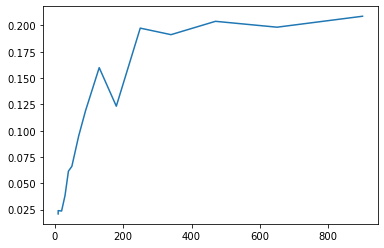

In [23]:
plt.plot(results['n_pca'], results['r2 score']);

**Вывод**: сокращение размерности с помощью PCA существенно ухудшает качество модели.